In [1]:
import torchvision.models as models
import torch.optim as optim
import time
import torch
import torch.nn as nn
from Train import trainmodel
time1 = time.time()
print(time1)
batch_size = [36]
device = 7
model_name_list = ["untran-resnet34"]
model1 = models.resnet34(pretrained=False)
model1


1591156179.1575286


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [2]:
model1.fc = nn.Linear(512,6)
model1

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

untran-resnet34
1768 328
Epoch: 1
Epoch: 001, Training: Loss: 1.5955, Accuracy: 38.9140%,Valid: Loss: 9.0951, Accuracy: 31.0976%,Time: 10.6171s
Epoch: 2
Epoch: 002, Training: Loss: 1.8487, Accuracy: 28.6765%,Valid: Loss: 1.8341, Accuracy: 26.2195%,Time: 10.3515s
Epoch: 3
Epoch: 003, Training: Loss: 1.5417, Accuracy: 35.5769%,Valid: Loss: 1.4797, Accuracy: 36.8902%,Time: 10.3691s
Epoch: 4
Epoch: 004, Training: Loss: 1.4860, Accuracy: 36.0294%,Valid: Loss: 1.5186, Accuracy: 35.0610%,Time: 10.1323s
Epoch: 5
Epoch: 005, Training: Loss: 1.4133, Accuracy: 40.1018%,Valid: Loss: 1.5439, Accuracy: 34.1463%,Time: 10.2256s
Epoch: 6
Epoch: 006, Training: Loss: 1.4576, Accuracy: 38.7443%,Valid: Loss: 1.5339, Accuracy: 36.2805%,Time: 10.2936s
Epoch: 7
Epoch: 007, Training: Loss: 1.4014, Accuracy: 41.0068%,Valid: Loss: 1.4808, Accuracy: 35.9756%,Time: 10.4191s
Epoch: 8
Epoch: 008, Training: Loss: 1.4078, Accuracy: 40.9502%,Valid: Loss: 1.4876, Accuracy: 37.1951%,Time: 10.6063s
Epoch: 9
Epoch: 009, Tr

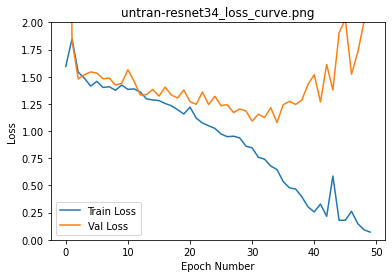

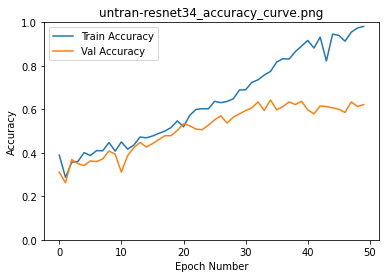

In [3]:
model_list = [model1]
lossfunc = torch.nn.CrossEntropyLoss().cuda(device)
for size in batch_size:
    i = 0
    for models in model_list:
        file_name = model_name_list[i]
        print(file_name)
        optimizer = optim.Adam(models.parameters())
        trainmodel(model_name=models,loss = lossfunc,batchsize=size,opti=optimizer,\
                   epoch_num=50,device_num=device,filename=file_name)
        i+=1